In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
test=pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')
train=pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')
sample=pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv')

In [4]:
train.shape,test.shape

((13636, 15), (4546, 14))

In [5]:
train

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13631,115,98,11767,Quick Cream of Mushroom Soup,sp_aUSaElGf_11767_c_127710,u_1oKVbHjirkAIWwTjbt9dWyqENo2,elbay,1,1622716969,0,0,0,5,100,Delicious!! Very easy to make! One minor chang...
13632,372,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_196030,u_1oKXoBnyJ2ocquNYwAhs19LMSrA,PauletteInhofe,1,1622717329,0,0,0,5,100,I made this pie for my family and they loved i...
13633,87,37,20170,Taco Lasagna,sp_aUSaElGf_20170_c_359338,u_1oKbGr5o9tj0mQl1rkVqzWnE481,Barbaralarkin,1,1622718089,0,0,0,5,100,Very tasty!
13634,48,63,24886,Chicken and Dumplings,sp_aUSaElGf_24886_c_175514,u_1oKWD7Dqjmc0oYHdW8Vm3fzhxJW,SammyPrissy,1,1622717192,0,0,0,5,100,I have made this numerous times. It&#39;s so ...


*col Information:*

*    **RecipeNumber and RecipeCode:** Unique identifiers for each recipe.
*    **RecipeName:** The name of the recipe.
*Review Details:*

*   **CommentID:** Unique identifier for each review.
*   **UserID and UserName:** User information who wrote the review.
*   **UserReputation:** Reputation or rating of the user.
*   **CreationTimestamp:** Timestamp indicating when the review was created.
*   **ReplyCount:** Number of replies or comments the review received.
*   **ThumbsUpCount and ThumbsDownCount:** Counts of thumbs-up (likes) and thumbs-down (dislikes) for the review.
*Rating and Scores:*

*   **Rating:** Numeric score given by the user for the recipe.
*   **BestScore:** Another score associated with the review.
*Review Content:*

*   **Recipe_Review:** The actual text content of the review, expressing the user's thoughts about the recipe.

In [6]:
train.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


corr mat for train data

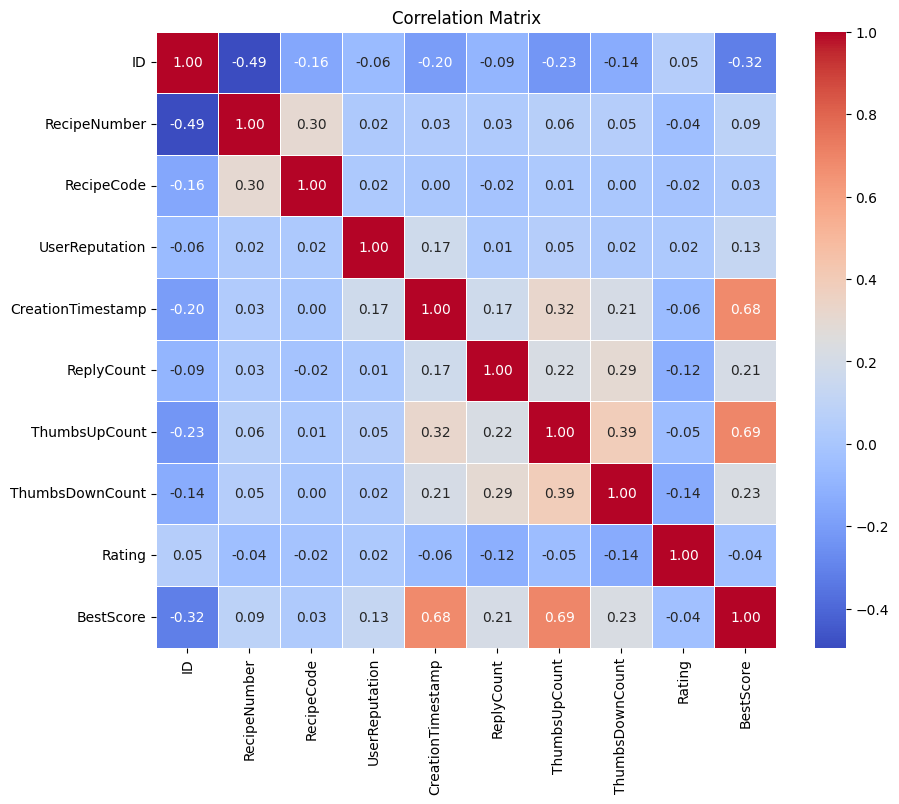

In [8]:
 import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'df'
numerical_columns = ['ID','RecipeNumber','RecipeCode','UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore']

# Selecting only the numerical columns from the DataFrame
numerical_df = train[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


corr mat for test data

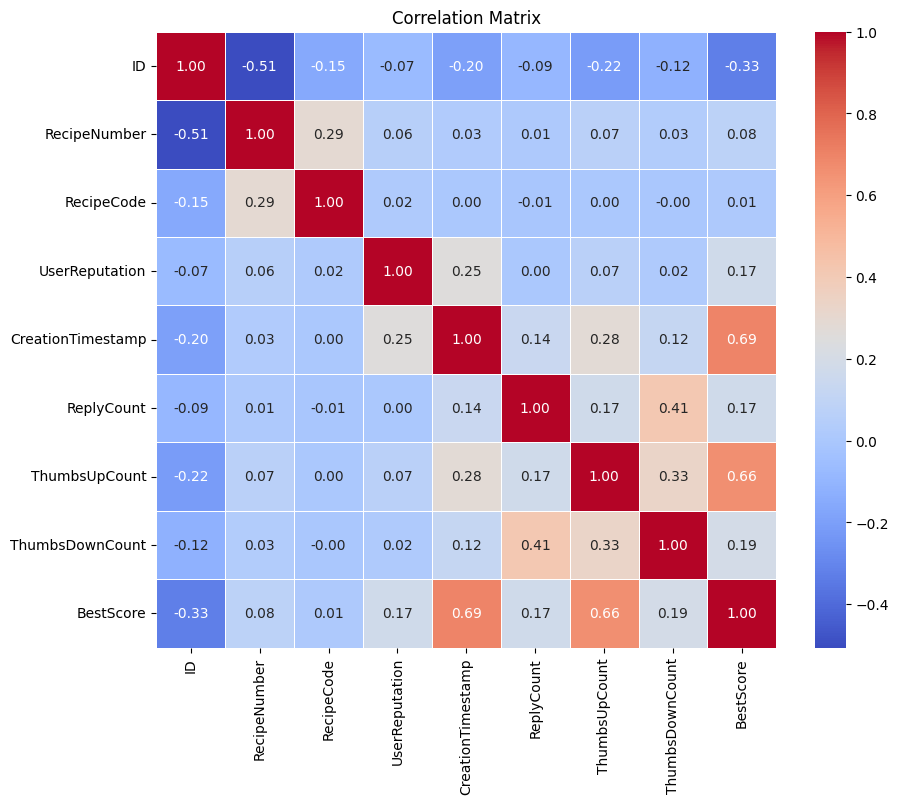

In [9]:
 import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'df'
numerical_columns = ['ID','RecipeNumber','RecipeCode','UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']

# Selecting only the numerical columns from the DataFrame
numerical_df = test[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train.drop(columns=['Rating']),train['Rating'],test_size=0.2,random_state=8)

In [12]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10908, 14), (2728, 14), (10908,), (2728,))

In [13]:
X_train.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        2
dtype: int64

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10908 entries, 12143 to 4547
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 10908 non-null  int64 
 1   RecipeNumber       10908 non-null  int64 
 2   RecipeCode         10908 non-null  int64 
 3   RecipeName         10908 non-null  object
 4   CommentID          10908 non-null  object
 5   UserID             10908 non-null  object
 6   UserName           10908 non-null  object
 7   UserReputation     10908 non-null  int64 
 8   CreationTimestamp  10908 non-null  int64 
 9   ReplyCount         10908 non-null  int64 
 10  ThumbsUpCount      10908 non-null  int64 
 11  ThumbsDownCount    10908 non-null  int64 
 12  BestScore          10908 non-null  int64 
 13  Recipe_Review      10906 non-null  object
dtypes: int64(9), object(5)
memory usage: 1.2+ MB


In [15]:
def grp(df):
    # Define groups based on similarity or type of dish
    groups = {
        'Chicken Dish': ['Baked Mushroom Chicken', 'Asian Chicken Thighs', 'Grilled Huli Huli Chicken', 'Flavorful Chicken Fajitas', 'Garlic Beef Enchiladas', 'Lime Chicken Tacos', 'Smothered Chicken Breasts', 'Bruschetta Chicken', 'Chicken Penne Casserole', 'Skillet Shepherd’s Pie', 'Teriyaki Chicken Thighs', 'Comforting Chicken Noodle Soup'],
        'Soup': ['Creamy White Chili', 'Stuffed Pepper Soup', 'Cauliflower Soup', 'Cheesy Ham Chowder', 'Slow-Cooker Lasagna', 'Creamy Macaroni and Cheese', 'Creamy Coleslaw', 'Rustic Italian Tortellini Soup', 'Quick Cream of Mushroom Soup', 'Chicken Wild Rice Soup'],
        'Dessert': ['Mom’s Meat Loaf', 'Banana Bars with Cream Cheese Frosting', 'Best Ever Banana Bread', 'Hot Milk Cake', 'Peanut Butter Chocolate Dessert', 'Chunky Apple Cake', 'Chocolate Caramel Candy', 'Pineapple Pudding Cake', 'First-Place Coconut Macaroons', 'Pumpkin Bars', 'Gluten-Free Banana Bread', 'Moist Chocolate Cake', 'Chocolate Chip Oatmeal Cookies', 'Frosted Banana Bars', 'Blueberry French Toast', 'Egg Roll Noodle Bowl', 'Apple Pie', 'Basic Banana Muffins', 'Rhubarb Custard Bars', 'Pumpkin Spice Cupcakes with Cream Cheese Frosting', 'Big Soft Ginger Cookies', 'Caramel-Pecan Cheesecake Pie', 'Caramel Heavenlies', 'Lemon Blueberry Bread', 'Easy Peanut Butter Fudge', 'Favorite Dutch Apple Pie', 'Peanut Butter Cup Cheesecake', 'Tennessee Peach Pudding', 'Chocolate-Strawberry Celebration Cake', 'Mamaw Emily’s Strawberry Cake', 'Sandy’s Chocolate Cake', 'Special Banana Nut Bread', 'Homemade Peanut Butter Cups'],
        'Casserole': ['Enchilada Casser-Ole!', 'Zucchini Pizza Casserole', 'Baked Spaghetti', 'Seafood Lasagna', 'Simple Au Gratin Potatoes', 'Amish Breakfast Casserole', 'Egg Roll Noodle Bowl', 'Twice-Baked Potato Casserole', 'Ravioli Lasagna', 'Macaroni Coleslaw', 'Bacon Macaroni Salad'],
        'Pie': ['Apple Pie', 'Favorite Dutch Apple Pie'],
        'Cake': ['Pumpkin Spice Cupcakes with Cream Cheese Frosting', 'Chocolate Guinness Cake', 'Pineapple Orange Cake', 'Fluffy Key Lime Pie', 'Peanut Butter Cup Cheesecake', 'Caramel-Pecan Cheesecake Pie', 'Caramel Heavenlies', 'Chocolate-Strawberry Celebration Cake', 'Mamaw Emily’s Strawberry Cake', 'Sandy’s Chocolate Cake'],
        'Bread': ['Best Ever Banana Bread', 'Hot Milk Cake', 'Basic Homemade Bread', 'Basic Banana Muffins', 'Pumpkin Bread'],
        'Salad': ['Creamy Grape Salad', 'Strawberry Pretzel Salad'],
        'Chili': ['Creamy White Chili', 'Black Bean ‘n’ Pumpkin Chili'],
        'Pudding': ['Pineapple Pudding Cake', 'Tennessee Peach Pudding'],
        'Lasagna': ['Slow-Cooker Lasagna', 'Ravioli Lasagna'],
        'Pancakes': ['Fluffy Pancakes', 'Brown Sugar Oatmeal Pancakes']
    }
    

# Map original recipe names to groups
    def map_to_group(recipe_name):
        for group, recipes in groups.items():
            if recipe_name in recipes:
                return group
        return 'Other'  # If recipe doesn't match any group, categorize as 'Other'

# Apply grouping to the RecipeName column
    df['RecipeName_Group'] = df['RecipeName'].apply(map_to_group)
    return (df)


In [16]:
X_train=grp(X_train)
X_test=grp(X_test)


In [17]:
def frequency_encoding(df, columns):
    """
    Apply Frequency Encoding to the specified categorical columns in the DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    columns (list): A list of column names to apply Frequency Encoding.

    Returns:
    DataFrame: The DataFrame with Frequency Encoding applied to the specified columns.
    """
    encoded_df = df.copy()
    for col in columns:
        frequency = df[col].value_counts(normalize=True)
        encoded_df[col + '_Frequency'] = df[col].map(frequency)
    return encoded_df
columns_to_encode = ['RecipeCode', 'RecipeName', 'UserName']
X_train_e = frequency_encoding(X_train, columns_to_encode)
X_test = frequency_encoding(X_test, columns_to_encode)


**---------------------------------------------------------------------working here  Trying to apply taget_encoding---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [18]:
X_train

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review,RecipeName_Group
12143,86,25,23222,Baked Mushroom Chicken,sp_aUSaElGf_23222_c_235137,u_1oKVo7kNlhRIfboy2EfIzD0QIzb,erutledge17,1,1622717463,0,0,0,100,Love this recipe! Serve it with with rice and ...,Chicken Dish
13240,14,52,27434,Asian Chicken Thighs,sp_aUSaElGf_27434_c_396155,u_1oKc8ZJSGi1amuIU3gdMOXKKiXp,Guest9175,0,1622718309,0,0,0,100,I made this for my wife and I per recipe. Ser...,Chicken Dish
13285,319,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_301561,u_1oKVbxj8WusP01jZ1UaIlom6w1j,282778,1,1622717846,0,0,0,100,This chili is great. The only changes I made: ...,Soup
11139,150,20,6504,Mom’s Meat Loaf,sp_aUSaElGf_6504_c_211240,u_1oKVrMA8t4zPd9w5iIY6rABWjRt,Yourmom242,1,1622717378,0,0,0,100,I used a little bit of ground pork with the gr...,Dessert
10321,30,70,32264,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_424072,u_1oKVsdg4PtZcJQAD00DjfbD1R0u,marcibanes,1,1622718437,0,1,1,142,Very Good. The only change I made was adding ...,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,4,24,957,Sandy’s Chocolate Cake,sp_aUSaElGf_957_c_1wQ9VzAi2VyLCJOD9IyTW77cP1N,u_0xZuH8ZJdeJe,Tim414,1,1628379973,0,8,1,728,This is the most amazing cake! Have made it se...,Dessert
10601,139,59,414,Lemon Blueberry Bread,sp_aUSaElGf_414_c_269005,u_1oKa40bwQinH59tCGNuOG49gLgs,khershey,1,1622717644,0,0,0,100,Really delicious! Followed the recipe except u...,Dessert
2033,79,66,7752,Chocolate Caramel Candy,sp_aUSaElGf_7752_c_327811,u_1oKX89Ekt5sQC9wbQOh7RClK2Jp,mom_jam,1,1622717964,0,0,0,100,"This recipe was great, but I got so frustrated...",Dessert
9556,64,85,39334,Chicken Penne Casserole,sp_aUSaElGf_39334_c_114857,u_1oKVeefrpdZ09kvdw9tdvZEjjDA,falknermimi,1,1622716920,0,0,0,100,"Amazing recipe, except I use chicken breast in...",Chicken Dish


In [19]:
# from category_encoders import TargetEncoder

# def target_encoding(df, columns, target_col):
#     """
#     Apply Target Encoding to the specified categorical columns in the DataFrame.

#     Parameters:
#     df (DataFrame): The DataFrame containing the data.
#     columns (list): A list of column names to apply Target Encoding.
#     target_col (str): The target column for encoding.

#     Returns:
#     DataFrame: The DataFrame with Target Encoding applied to the specified columns.
#     """
#     encoded_df = df.copy()
#     encoder = TargetEncoder()
#     encoded_df[columns] = encoder.fit_transform(df[columns], df[target_col])
#     return encoded_df
# columns_to_encode = ['RecipeName', 'UserName']
# target_col = 'Rating'  # Assuming 'Rating' is your target column

# X_train = target_encoding(X_train, columns_to_encode,target_col)
# # X_test = target_encoding(X_test, columns_to_encode,target_col)

In [20]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


ct = ColumnTransformer([
    ('ohe_RNG', OneHotEncoder(), ['RecipeName_Group'])
], remainder='passthrough',verbose_feature_names_out=False)

# Fit and transform the column transformer on X_train
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)
# Get the column names for the transformed DataFrame
transformed_columns = ct.get_feature_names_out()

# Convert the transformed array to a DataFrame with the proper column names
X_train_df = pd.DataFrame(X_train_transformed, columns=transformed_columns)
X_test_df = pd.DataFrame(X_test_transformed, columns=transformed_columns)

X_test_df

,RecipeName_Group_Bread,RecipeName_Group_Cake,RecipeName_Group_Casserole,RecipeName_Group_Chicken Dish,RecipeName_Group_Chili,RecipeName_Group_Dessert,RecipeName_Group_Other,RecipeName_Group_Pancakes,RecipeName_Group_Salad,RecipeName_Group_Soup,...,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,sp_aUSaElGf_12003_c_156719,u_1oKW8JtaATPFmPnsoe6TFKPsvE7,blueyedjla,1,1622717126,0,0,0,100,I make this lasagna on special occasions two ...
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,sp_aUSaElGf_42083_c_421675,u_1oKVeQ7jplcv6S5Ln6MAR8CNjF3,blhenn,1,1622718419,0,0,0,100,This was pretty good. I do have one complaint ...
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,sp_aUSaElGf_1196_c_145762,u_1oKWUfOhy73fLC6aeXCp3vRHJzI,mntncrone,1,1622717058,0,0,0,100,"Good flavor, nice spice. Mine came out overly..."
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,sp_aUSaElGf_18274_c_240766,u_1oKXUL4CDjglNU9l0e45mdNTmxN,pacheryl50,1,1622717540,0,1,0,193,Made this and it&#39;s fabulous... Now I need ...
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,sp_aUSaElGf_3309_c_409865,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,1,1613039486,0,0,0,100,Really a nice recipe. My family cannot have n...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,sp_aUSaElGf_39545_c_172769,u_1oKVq4AZswYYWmOALNhiSw8u8Wu,benenati,1,1622717166,0,0,1,100,I have been making this recipe for many years....
2724,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,sp_aUSaElGf_10248_c_423836,u_1oKaxPEcMTeGl0DYRiCH74oPJh3,sebc46,1,1622718436,0,2,0,253,Very good. Hubby liked it a lot. I agree tha...
2725,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,sp_aUSaElGf_14600_c_151515,u_1oKWilA4gynWg3pGMLVaKj7R6Cd,1happyGigi,1,1622717088,0,0,0,100,Great sweet corn bread recipe. I’ve made it tw...
2726,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,sp_aUSaElGf_7178_c_293489,u_1oKVkLLOMv2WA5laa7eXOcDj1md,desn2004,1,1622717817,0,1,0,193,These cupcakes are absolutely delicious! We al...


In [21]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# import pandas as pd
# df = pd.DataFrame(X_test_df)

# # Initialize the TF-IDF Vectorizer
# tfidf_vectorizer = TfidfVectorizer()

# # Fit the vectorizer to the reviews and transform the text into TF-IDF features
# tfidf_features = tfidf_vectorizer.fit_transform(df['Recipe_Review'])

# # Convert the TF-IDF features to a dense matrix
# dense_tfidf_features = tfidf_features.todense()

# # Get the feature names
# feature_names = tfidf_vectorizer.get_feature_names_out()

# # Convert the dense matrix of features into a DataFrame with the proper column names
# tfidf_df = pd.DataFrame(dense_tfidf_features, columns=feature_names)

# # Display the resulting DataFrame
# print(tfidf_df.head())


NLP

In [22]:
import nltk
nltk.download('punkt') # Download the Punkt tokenizer models


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:

from nltk.tokenize import word_tokenize
import pandas as pd

# Function to tokenize a specified column in a DataFrame
def tokenize_text_column(dataframe, text_column):
    # Ensure the text is a string
    dataframe[text_column] = dataframe[text_column].astype(str)

    # Tokenize each review
    tokenized_column_name = f'Tokenized_{text_column}'
    dataframe[tokenized_column_name] = dataframe[text_column].apply(word_tokenize)

    return dataframe

testdf = tokenize_text_column(X_test_df, 'Recipe_Review')
train_df = tokenize_text_column(X_train_df, 'Recipe_Review')

testdf = tokenize_text_column(testdf, 'RecipeName')
train_df = tokenize_text_column(train_df, 'RecipeName')




In [24]:
X_train_df

,RecipeName_Group_Bread,RecipeName_Group_Cake,RecipeName_Group_Casserole,RecipeName_Group_Chicken Dish,RecipeName_Group_Chili,RecipeName_Group_Dessert,RecipeName_Group_Other,RecipeName_Group_Pancakes,RecipeName_Group_Salad,RecipeName_Group_Soup,...,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review,Tokenized_Recipe_Review,Tokenized_RecipeName
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,erutledge17,1,1622717463,0,0,0,100,Love this recipe! Serve it with with rice and ...,"[Love, this, recipe, !, Serve, it, with, with,...","[Baked, Mushroom, Chicken]"
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Guest9175,0,1622718309,0,0,0,100,I made this for my wife and I per recipe. Ser...,"[I, made, this, for, my, wife, and, I, per, re...","[Asian, Chicken, Thighs]"
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,282778,1,1622717846,0,0,0,100,This chili is great. The only changes I made: ...,"[This, chili, is, great, ., The, only, changes...","[Creamy, White, Chili]"
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,Yourmom242,1,1622717378,0,0,0,100,I used a little bit of ground pork with the gr...,"[I, used, a, little, bit, of, ground, pork, wi...","[Mom, ’, s, Meat, Loaf]"
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,marcibanes,1,1622718437,0,1,1,142,Very Good. The only change I made was adding ...,"[Very, Good, ., The, only, change, I, made, wa...","[Easy, Chicken, Enchiladas]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,Tim414,1,1628379973,0,8,1,728,This is the most amazing cake! Have made it se...,"[This, is, the, most, amazing, cake, !, Have, ...","[Sandy, ’, s, Chocolate, Cake]"
10904,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,khershey,1,1622717644,0,0,0,100,Really delicious! Followed the recipe except u...,"[Really, delicious, !, Followed, the, recipe, ...","[Lemon, Blueberry, Bread]"
10905,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,mom_jam,1,1622717964,0,0,0,100,"This recipe was great, but I got so frustrated...","[This, recipe, was, great, ,, but, I, got, so,...","[Chocolate, Caramel, Candy]"
10906,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,falknermimi,1,1622716920,0,0,0,100,"Amazing recipe, except I use chicken breast in...","[Amazing, recipe, ,, except, I, use, chicken, ...","[Chicken, Penne, Casserole]"


In [25]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import pandas as pd

def convert_tokens_and_add_pca_to_df(df, tokenized_text_col):
    # Join the tokenized text into a single string
    processed_text = df[tokenized_text_col].apply(lambda x: ' '.join(x))
    
    # Initialize and fit the TF-IDF Vectorizer
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_features = tfidf_vectorizer.fit_transform(processed_text)
    
    # Convert TF-IDF features to a DataFrame
    tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
    
    # Apply PCA on the TF-IDF DataFrame
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(tfidf_df)
    
    # Convert PCA results into a DataFrame
    pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
    
    # Append the PCA result columns back to the original DataFrame
    df['PCA1'] = pca_df['PCA1']
    df['PCA2'] = pca_df['PCA2']
#     df['PCA3'] = pca_df['PCA3']
    
    return df
def convert_tokens_and_add_pca_to_df2(df, tokenized_text_col):
    # Join the tokenized text into a single string
    processed_text = df[tokenized_text_col].apply(lambda x: ' '.join(x))
    
    # Initialize and fit the TF-IDF Vectorizer
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_features = tfidf_vectorizer.fit_transform(processed_text)
    
    # Convert TF-IDF features to a DataFrame
    tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
    
    # Apply PCA on the TF-IDF DataFrame
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(tfidf_df)
    
    # Convert PCA results into a DataFrame
    pca_df = pd.DataFrame(pca_result, columns=['PCA3', 'PCA4'])
    
    # Append the PCA result columns back to the original DataFrame
    df['PCA3'] = pca_df['PCA3']
    df['PCA4'] = pca_df['PCA4']
#     df['PCA3'] = pca_df['PCA3']
    
    return df

# Assuming 'traindf' is your DataFrame and 'Tokenized_Recipe_Review' is the column with tokenized text
traindf_with_pca = convert_tokens_and_add_pca_to_df(X_train_df, 'Tokenized_Recipe_Review')
testdf_with_pca = convert_tokens_and_add_pca_to_df(X_test_df, 'Tokenized_Recipe_Review')

traindf_with_pca = convert_tokens_and_add_pca_to_df2(traindf_with_pca, 'Tokenized_RecipeName')
testdf_with_pca = convert_tokens_and_add_pca_to_df2(testdf_with_pca, 'Tokenized_RecipeName')
# Now 'traindf_with_pca' will have the original data along with two new columns: 'PCA1' and 'PCA2'


In [26]:
X_train_df=traindf_with_pca
X_test_df=testdf_with_pca

In [27]:
X_train_df

,RecipeName_Group_Bread,RecipeName_Group_Cake,RecipeName_Group_Casserole,RecipeName_Group_Chicken Dish,RecipeName_Group_Chili,RecipeName_Group_Dessert,RecipeName_Group_Other,RecipeName_Group_Pancakes,RecipeName_Group_Salad,RecipeName_Group_Soup,...,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review,Tokenized_Recipe_Review,Tokenized_RecipeName,PCA1,PCA2,PCA3,PCA4
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,100,Love this recipe! Serve it with with rice and ...,"[Love, this, recipe, !, Serve, it, with, with,...","[Baked, Mushroom, Chicken]",-0.037726,0.053104,-0.055518,0.024178
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,100,I made this for my wife and I per recipe. Ser...,"[I, made, this, for, my, wife, and, I, per, re...","[Asian, Chicken, Thighs]",0.097038,0.115377,-0.056402,0.023529
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,100,This chili is great. The only changes I made: ...,"[This, chili, is, great, ., The, only, changes...","[Creamy, White, Chili]",-0.132680,0.063423,-0.235971,0.769070
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,100,I used a little bit of ground pork with the gr...,"[I, used, a, little, bit, of, ground, pork, wi...","[Mom, ’, s, Meat, Loaf]",-0.015577,0.010451,-0.040828,-0.008432
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,1,142,Very Good. The only change I made was adding ...,"[Very, Good, ., The, only, change, I, made, wa...","[Easy, Chicken, Enchiladas]",0.002939,0.109973,-0.054014,0.019260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,8,1,728,This is the most amazing cake! Have made it se...,"[This, is, the, most, amazing, cake, !, Have, ...","[Sandy, ’, s, Chocolate, Cake]",-0.023030,0.020832,-0.090779,-0.026919
10904,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,100,Really delicious! Followed the recipe except u...,"[Really, delicious, !, Followed, the, recipe, ...","[Lemon, Blueberry, Bread]",-0.008234,-0.064576,-0.081590,-0.193151
10905,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,100,"This recipe was great, but I got so frustrated...","[This, recipe, was, great, ,, but, I, got, so,...","[Chocolate, Caramel, Candy]",0.014503,0.001729,-0.056809,-0.015034
10906,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,100,"Amazing recipe, except I use chicken breast in...","[Amazing, recipe, ,, except, I, use, chicken, ...","[Chicken, Penne, Casserole]",-0.036892,-0.061068,-0.070807,0.018098


In [28]:
import pandas as pd

def add_temporal_features(df, timestamp_column):
    """
    Adds temporal features to a DataFrame based on a Unix timestamp column.
    
    Parameters:
    - df: pandas DataFrame containing the data.
    - timestamp_column: String name of the column in df that contains Unix timestamps.
    
    Returns:
    - df: The original DataFrame with three new columns added: 'HourOfDay', 'DayOfWeek', and 'Month'.
    """
    # Convert Unix timestamp to datetime
    df['CreationDateTime'] = pd.to_datetime(df[timestamp_column], unit='s')
    
    # Extract temporal features
    df['HourOfDay'] = df['CreationDateTime'].dt.hour
    df['DayOfWeek'] = df['CreationDateTime'].dt.dayofweek
    df['Month'] = df['CreationDateTime'].dt.month
    
    return df

# Example usage:
# Assuming X_train is your DataFrame and 'CreationTimestamp' is the column with Unix timestamps
X_train_df = add_temporal_features(X_train_df, 'CreationTimestamp')
X_test_df = add_temporal_features(X_test_df, 'CreationTimestamp')



In [29]:
X_test_df

,RecipeName_Group_Bread,RecipeName_Group_Cake,RecipeName_Group_Casserole,RecipeName_Group_Chicken Dish,RecipeName_Group_Chili,RecipeName_Group_Dessert,RecipeName_Group_Other,RecipeName_Group_Pancakes,RecipeName_Group_Salad,RecipeName_Group_Soup,...,Tokenized_Recipe_Review,Tokenized_RecipeName,PCA1,PCA2,PCA3,PCA4,CreationDateTime,HourOfDay,DayOfWeek,Month
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,"[I, make, this, lasagna, on, special, occasion...","[Traditional, Lasagna]",-0.048150,0.071716,-0.056386,-0.083124,2021-06-03 10:45:26,10,3,6
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"[This, was, pretty, good, ., I, do, have, one,...","[Enchilada, Casser-Ole, !]",-0.053312,-0.095788,-0.035689,-0.038372,2021-06-03 11:06:59,11,3,6
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"[Good, flavor, ,, nice, spice, ., Mine, came, ...","[Pumpkin, Bread]",0.034461,-0.085662,-0.100366,-0.170881,2021-06-03 10:44:18,10,3,6
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"[Made, this, and, it, &, #, 39, ;, s, fabulous...","[Ravioli, Lasagna]",-0.042114,0.018869,-0.048343,-0.068775,2021-06-03 10:52:20,10,3,6
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,"[Really, a, nice, recipe, ., My, family, can, ...","[Best, Ever, Banana, Bread]",-0.001750,-0.001022,-0.067903,-0.301159,2021-02-11 10:31:26,10,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,"[I, have, been, making, this, recipe, for, man...","[White, Bean, Chicken, Chili]",-0.113086,0.020604,-0.253088,0.554310,2021-06-03 10:46:06,10,3,6
2724,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"[Very, good, ., Hubby, liked, it, a, lot, ., I...","[Garlic, Beef, Enchiladas]",-0.055992,-0.071137,-0.030829,-0.030186,2021-06-03 11:07:16,11,3,6
2725,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,"[Great, sweet, corn, bread, recipe, ., I, ’, v...","[Buttery, Cornbread]",-0.068841,-0.054214,-0.028983,-0.030716,2021-06-03 10:44:48,10,3,6
2726,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,"[These, cupcakes, are, absolutely, delicious, ...","[Zucchini, Cupcake]",-0.047967,-0.004404,-0.039939,-0.047232,2021-06-03 10:56:57,10,3,6


In [30]:
# X_train_df = X_train_df.drop(columns=['CreationDateTime'])
# X_test_df = X_test_df.drop(columns=['CreationDateTime'])


In [31]:
def drop(df):
    df=df.drop(columns=['RecipeName','CommentID','UserID','UserName','Tokenized_Recipe_Review','Tokenized_RecipeName','CreationDateTime','Recipe_Review'])
    return df
X_train=drop(X_train_df)
X_test=drop(X_test_df)
X_train

,RecipeName_Group_Bread,RecipeName_Group_Cake,RecipeName_Group_Casserole,RecipeName_Group_Chicken Dish,RecipeName_Group_Chili,RecipeName_Group_Dessert,RecipeName_Group_Other,RecipeName_Group_Pancakes,RecipeName_Group_Salad,RecipeName_Group_Soup,...,ThumbsUpCount,ThumbsDownCount,BestScore,PCA1,PCA2,PCA3,PCA4,HourOfDay,DayOfWeek,Month
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,100,-0.037726,0.053104,-0.055518,0.024178,10,3,6
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,100,0.097038,0.115377,-0.056402,0.023529,11,3,6
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,100,-0.132680,0.063423,-0.235971,0.769070,10,3,6
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,100,-0.015577,0.010451,-0.040828,-0.008432,10,3,6
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,1,142,0.002939,0.109973,-0.054014,0.019260,11,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,8,1,728,-0.023030,0.020832,-0.090779,-0.026919,23,5,8
10904,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,100,-0.008234,-0.064576,-0.081590,-0.193151,10,3,6
10905,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,100,0.014503,0.001729,-0.056809,-0.015034,10,3,6
10906,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,100,-0.036892,-0.061068,-0.070807,0.018098,10,3,6


In [32]:
X_test

,RecipeName_Group_Bread,RecipeName_Group_Cake,RecipeName_Group_Casserole,RecipeName_Group_Chicken Dish,RecipeName_Group_Chili,RecipeName_Group_Dessert,RecipeName_Group_Other,RecipeName_Group_Pancakes,RecipeName_Group_Salad,RecipeName_Group_Soup,...,ThumbsUpCount,ThumbsDownCount,BestScore,PCA1,PCA2,PCA3,PCA4,HourOfDay,DayOfWeek,Month
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,100,-0.048150,0.071716,-0.056386,-0.083124,10,3,6
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,100,-0.053312,-0.095788,-0.035689,-0.038372,11,3,6
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,100,0.034461,-0.085662,-0.100366,-0.170881,10,3,6
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,193,-0.042114,0.018869,-0.048343,-0.068775,10,3,6
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,100,-0.001750,-0.001022,-0.067903,-0.301159,10,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,100,-0.113086,0.020604,-0.253088,0.554310,10,3,6
2724,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,253,-0.055992,-0.071137,-0.030829,-0.030186,11,3,6
2725,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,100,-0.068841,-0.054214,-0.028983,-0.030716,10,3,6
2726,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,193,-0.047967,-0.004404,-0.039939,-0.047232,10,3,6


In [33]:
# import pandas as pd

# # Assuming `df` is your DataFrame
# for column in X_train.columns:
#     # Check if the column is of object type
#     if X_train[column].dtype == 'object':
#         try:
#             X_train[column] = pd.to_numeric(X_train[column], errors='raise')
#         except ValueError:
#             print(f"Conversion failed for column: {column}")
import pandas as pd

def convert_object_columns_to_numeric(df):
   
    for column in df.columns:
        # Check if the column is of object type
        if df[column].dtype == 'object':
            try:
                df[column] = pd.to_numeric(df[column], errors='raise')
            except ValueError:
                print(f"Conversion failed for column: {column}")
    return df


X_train = convert_object_columns_to_numeric(X_train)
X_test = convert_object_columns_to_numeric(X_test)


In [34]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2728 entries, 0 to 2727
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   RecipeName_Group_Bread         2728 non-null   float64
 1   RecipeName_Group_Cake          2728 non-null   float64
 2   RecipeName_Group_Casserole     2728 non-null   float64
 3   RecipeName_Group_Chicken Dish  2728 non-null   float64
 4   RecipeName_Group_Chili         2728 non-null   float64
 5   RecipeName_Group_Dessert       2728 non-null   float64
 6   RecipeName_Group_Other         2728 non-null   float64
 7   RecipeName_Group_Pancakes      2728 non-null   float64
 8   RecipeName_Group_Salad         2728 non-null   float64
 9   RecipeName_Group_Soup          2728 non-null   float64
 10  ID                             2728 non-null   int64  
 11  RecipeNumber                   2728 non-null   int64  
 12  RecipeCode                     2728 non-null   i

In [35]:
X_train['RecipeName_Group_Dessert']

0        0.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
10903    1.0
10904    1.0
10905    1.0
10906    0.0
10907    1.0
Name: RecipeName_Group_Dessert, Length: 10908, dtype: float64

In [36]:
X_train_df=X_train
X_test_df=X_test

Model building


In [37]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
DC = DummyClassifier()
DC.fit(X_train_df,y_train)
LC =LogisticRegression()
LC.fit(X_train_df,y_train)

LogisticRegression()

In [38]:
y_pred_DC = DC.predict(X_test_df)
y_pred_LC = LC.predict(X_test_df)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_DC),accuracy_score(y_test,y_pred_LC)

(0.7562316715542522, 0.7562316715542522)

In [40]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3,random_state=42)
tree.fit(X_train_df,y_train)
y_pred_TC=tree.predict(X_test_df)
accuracy_score(y_test,y_pred_TC)

0.7639296187683284

In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [1,2,3,4,5,6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train_df,y_train)
best_tree = grid_search.best_estimator_


In [42]:
best_tree

DecisionTreeClassifier(max_depth=3, random_state=42)

Random Forest

In [43]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [150, 170],
#     'max_depth': [20,25],
#     'min_samples_split': [7, 8, 9],
#     'min_samples_leaf': [2, 3,4],
#     'max_features': ['sqrt'],
#     'bootstrap': [False]
# }

# # Create a RandomForestClassifier object
# rf_classifier = RandomForestClassifier(random_state=42)

# # Create GridSearchCV object
# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=4, scoring='accuracy', n_jobs=-1)

# # Perform grid search
# grid_search.fit(X_train_df, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Get the best model
# best_rf_classifier = grid_search.best_estimator_

# # Make predictions on the test data using the best model
# y_pred_rf_tuned = best_rf_classifier.predict(X_test_df)

# # Calculate accuracy score
# accuracy_tuned = accuracy_score(y_test, y_pred_rf_tuned)
# print("Tuned Accuracy Score:", accuracy_tuned)


Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Tuned Accuracy Score: 0.7661290322580645

In [44]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score

# # Define the parameter grid to search
# param_grid = {
#     'criterion': ['gini'],
#     'max_depth': [None, 2, 3],
#     'min_samples_split': [4, 5, 6],
#     'min_samples_leaf': [1, 2]
# }

# # Create a DecisionTreeClassifier object
# dt_classifier = DecisionTreeClassifier(random_state=42)

# # Create GridSearchCV object
# grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=8, scoring='accuracy', n_jobs=-1)

# # Perform grid search
# grid_search.fit(X_train_df, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Get the best model
# best_dt_classifier = grid_search.best_estimator_

# # Make predictions on the test data using the best model
# y_pred_dt_tuned = best_dt_classifier.predict(X_test_df)

# # Calculate accuracy score
# accuracy_tuned = accuracy_score(y_test, y_pred_dt_tuned)
# print("Tuned Accuracy Score:", accuracy_tuned)


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize RandomForestClassifier with specified hyperparameters
rf_classifier = RandomForestClassifier(bootstrap=False, max_depth=20, max_features='sqrt',
                                        min_samples_leaf=2, min_samples_split=10, n_estimators=100,
                                        random_state=42)

# Train the classifier
rf_classifier.fit(X_train_df, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test_df)

# Calculate accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("RandomForestClassifier Accuracy Score:", accuracy_rf)


RandomForestClassifier Accuracy Score: 0.7628299120234604


SVM

In [46]:
from sklearn.svm import SVC

# Define the SVM classifier with the provided hyperparameters
svm_classifier = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', 
                     coef0=0.0, shrinking=True, probability=False, 
                     tol=0.001, cache_size=200, class_weight=None, 
                     verbose=False, max_iter=-1, decision_function_shape='ovr', 
                     break_ties=False, random_state=None)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train_df, y_train)

# Make predictions on the test data
y_pred_svm = svm_classifier.predict(X_test_df)

# Evaluate the accuracy of the SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Classifier Accuracy Score:", accuracy_svm)


SVM Classifier Accuracy Score: 0.7562316715542522


In [47]:
import numpy as np
y_pred_rf_tr = rf_classifier.predict(X_train_df)
y_pred_svm_tr = svm_classifier.predict(X_train_df)
# Combine predictions made by both classifiers
train_stacked = np.column_stack((y_pred_svm_tr, y_pred_rf_tr))


# Combine predictions made by both classifiers
test_stacked = np.column_stack((svm_classifier.predict(X_test_df), rf_classifier.predict(X_test_df)))

In [48]:
train_stacked,test_stacked

(array([[5, 5],
        [5, 5],
        [5, 5],
        ...,
        [5, 5],
        [5, 5],
        [5, 5]]),
 array([[5, 5],
        [5, 5],
        [5, 5],
        ...,
        [5, 5],
        [5, 5],
        [5, 5]]))

Final models

In [49]:




from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Initialize the Perceptron classifier
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(train_stacked, y_train)

# Make predictions on the test data using the meta-classifier
y_pred_meta = perceptron.predict(test_stacked)

# Calculate accuracy score of the stacked classifier
accuracy_stacked = accuracy_score(y_test, y_pred_meta)
print("Stacked Classifier Accuracy Score:", accuracy_stacked)



Stacked Classifier Accuracy Score: 0.10043988269794721


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression classifier
logistic_regression = LogisticRegression(max_iter=1000, tol=1e-3, random_state=42, solver='lbfgs')

# Fit the model on the training data
logistic_regression.fit(train_stacked, y_train)

# Make predictions on the test data using the meta-classifier
y_pred_meta_logistic = logistic_regression.predict(test_stacked)

# Calculate accuracy score of the logistic regression classifier
accuracy_logistic = accuracy_score(y_test, y_pred_meta_logistic)
print("Logistic Regression Classifier Accuracy Score:", accuracy_logistic)


Logistic Regression Classifier Accuracy Score: 0.7624633431085044


In [51]:
test_stacked.shape,y_test.shape,train_stacked.shape, y_train.shape[0]

((2728, 2), (2728,), (10908, 2), 10908)

**Test data work**

In [52]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2728 entries, 0 to 2727
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   RecipeName_Group_Bread         2728 non-null   object        
 1   RecipeName_Group_Cake          2728 non-null   object        
 2   RecipeName_Group_Casserole     2728 non-null   object        
 3   RecipeName_Group_Chicken Dish  2728 non-null   object        
 4   RecipeName_Group_Chili         2728 non-null   object        
 5   RecipeName_Group_Dessert       2728 non-null   object        
 6   RecipeName_Group_Other         2728 non-null   object        
 7   RecipeName_Group_Pancakes      2728 non-null   object        
 8   RecipeName_Group_Salad         2728 non-null   object        
 9   RecipeName_Group_Soup          2728 non-null   object        
 10  ID                             2728 non-null   object        
 11  RecipeNumber     

In [53]:
testdf

,RecipeName_Group_Bread,RecipeName_Group_Cake,RecipeName_Group_Casserole,RecipeName_Group_Chicken Dish,RecipeName_Group_Chili,RecipeName_Group_Dessert,RecipeName_Group_Other,RecipeName_Group_Pancakes,RecipeName_Group_Salad,RecipeName_Group_Soup,...,Tokenized_Recipe_Review,Tokenized_RecipeName,PCA1,PCA2,PCA3,PCA4,CreationDateTime,HourOfDay,DayOfWeek,Month
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,"[I, make, this, lasagna, on, special, occasion...","[Traditional, Lasagna]",-0.048150,0.071716,-0.056386,-0.083124,2021-06-03 10:45:26,10,3,6
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"[This, was, pretty, good, ., I, do, have, one,...","[Enchilada, Casser-Ole, !]",-0.053312,-0.095788,-0.035689,-0.038372,2021-06-03 11:06:59,11,3,6
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"[Good, flavor, ,, nice, spice, ., Mine, came, ...","[Pumpkin, Bread]",0.034461,-0.085662,-0.100366,-0.170881,2021-06-03 10:44:18,10,3,6
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"[Made, this, and, it, &, #, 39, ;, s, fabulous...","[Ravioli, Lasagna]",-0.042114,0.018869,-0.048343,-0.068775,2021-06-03 10:52:20,10,3,6
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,"[Really, a, nice, recipe, ., My, family, can, ...","[Best, Ever, Banana, Bread]",-0.001750,-0.001022,-0.067903,-0.301159,2021-02-11 10:31:26,10,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,"[I, have, been, making, this, recipe, for, man...","[White, Bean, Chicken, Chili]",-0.113086,0.020604,-0.253088,0.554310,2021-06-03 10:46:06,10,3,6
2724,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"[Very, good, ., Hubby, liked, it, a, lot, ., I...","[Garlic, Beef, Enchiladas]",-0.055992,-0.071137,-0.030829,-0.030186,2021-06-03 11:07:16,11,3,6
2725,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,"[Great, sweet, corn, bread, recipe, ., I, ’, v...","[Buttery, Cornbread]",-0.068841,-0.054214,-0.028983,-0.030716,2021-06-03 10:44:48,10,3,6
2726,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,"[These, cupcakes, are, absolutely, delicious, ...","[Zucchini, Cupcake]",-0.047967,-0.004404,-0.039939,-0.047232,2021-06-03 10:56:57,10,3,6


In [54]:
X_test_df = add_temporal_features(test, 'CreationTimestamp')

testdf = tokenize_text_column(testdf_with_pca, 'Recipe_Review')
testdf_with_pca = convert_tokens_and_add_pca_to_df(testdf, 'Tokenized_Recipe_Review')
testdf = tokenize_text_column(testdf, 'RecipeName')
test = convert_tokens_and_add_pca_to_df2(testdf, 'Tokenized_RecipeName')

In [55]:
# X_test=drop(test)

In [56]:

# test=X_test.drop(columns=['RecipeName_Group'])
    

In [57]:
# testd

In [58]:
testg=grp(test)
testd=drop(testg)
testd
# ct = ColumnTransformer([
#     ('ohe_RNG', OneHotEncoder(), ['RecipeName_Group'])
# ], remainder='passthrough',verbose_feature_names_out=False)

# # Fit and transform the column transformer on X_train
# test_transformed = ct.fit_transform(testd)

# transformed_columns = ct.get_feature_names_out()

# test_df = pd.DataFrame(test_transformed, columns=transformed_columns)
testd

,RecipeName_Group_Bread,RecipeName_Group_Cake,RecipeName_Group_Casserole,RecipeName_Group_Chicken Dish,RecipeName_Group_Chili,RecipeName_Group_Dessert,RecipeName_Group_Other,RecipeName_Group_Pancakes,RecipeName_Group_Salad,RecipeName_Group_Soup,...,ThumbsDownCount,BestScore,PCA1,PCA2,PCA3,PCA4,HourOfDay,DayOfWeek,Month,RecipeName_Group
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,100,-0.048173,0.071895,-0.056535,-0.083291,10,3,6,Other
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,100,-0.053324,-0.095583,-0.035639,-0.037926,11,3,6,Casserole
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,100,0.034378,-0.085531,-0.100269,-0.170799,10,3,6,Bread
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,193,-0.042165,0.018672,-0.048405,-0.068877,10,3,6,Casserole
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,100,-0.001801,-0.000611,-0.068270,-0.301847,10,3,2,Dessert
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,100,-0.113070,0.020480,-0.253115,0.554008,10,3,6,Other
2724,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,253,-0.056063,-0.071365,-0.030787,-0.030171,11,3,6,Chicken Dish
2725,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,100,-0.068833,-0.054343,-0.028904,-0.030601,10,3,6,Other
2726,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,193,-0.047950,-0.004410,-0.040648,-0.047630,10,3,6,Other


In [59]:
test_df = testd.drop(columns=['RecipeName_Group'])

In [60]:
# test_df = add_temporal_features(test_df, 'CreationTimestamp')
# test_df = test_df.drop(columns=['CreationDateTime'])

In [61]:
test_df

,RecipeName_Group_Bread,RecipeName_Group_Cake,RecipeName_Group_Casserole,RecipeName_Group_Chicken Dish,RecipeName_Group_Chili,RecipeName_Group_Dessert,RecipeName_Group_Other,RecipeName_Group_Pancakes,RecipeName_Group_Salad,RecipeName_Group_Soup,...,ThumbsUpCount,ThumbsDownCount,BestScore,PCA1,PCA2,PCA3,PCA4,HourOfDay,DayOfWeek,Month
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,100,-0.048173,0.071895,-0.056535,-0.083291,10,3,6
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,100,-0.053324,-0.095583,-0.035639,-0.037926,11,3,6
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,100,0.034378,-0.085531,-0.100269,-0.170799,10,3,6
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,193,-0.042165,0.018672,-0.048405,-0.068877,10,3,6
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,100,-0.001801,-0.000611,-0.068270,-0.301847,10,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,100,-0.113070,0.020480,-0.253115,0.554008,10,3,6
2724,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,253,-0.056063,-0.071365,-0.030787,-0.030171,11,3,6
2725,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,100,-0.068833,-0.054343,-0.028904,-0.030601,10,3,6
2726,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,193,-0.047950,-0.004410,-0.040648,-0.047630,10,3,6


**Submission Work**

In [62]:
y_pred_rf_test = rf_classifier.predict(test_df)
y_pred_svm_test = svm_classifier.predict(test_df)
# Combine predictions made by both classifiers
test_df = np.column_stack((y_pred_svm_test, y_pred_rf_test))


In [63]:
test_df.shape

(2728, 2)

In [64]:

y_pred_test=perceptron.predict(test_df)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
submission = pd.DataFrame(columns = ['ID','Rating'])
submission['Rating'] = y_pred_test
submission['ID'] = [i for i in range(1, len(y_pred_test)+1)]
submission.to_csv('submission.csv',index=False)


In [66]:
pd.read_csv("/kaggle/working/submission.csv")

,ID,Rating
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
2723,2724,0
2724,2725,0
2725,2726,0
2726,2727,0
